# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [41]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [42]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


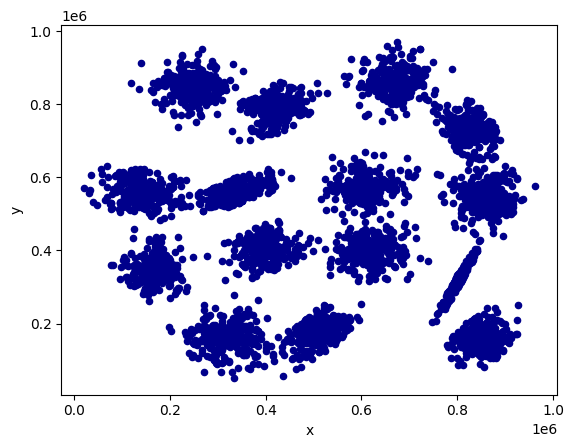

In [43]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

In [44]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [45]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []


In [46]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Temukan jumlah cluster terbaik berdasarkan Silhouette Score tertinggi
best_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

print("Best number of clusters based on Silhouette Score:", best_n_clusters)
print("Best Silhouette Score:", max(silhouette_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best number of clusters based on Silhouette Score: 10
Best Silhouette Score: 0.6028694613898736


## Proses Visualisasi hasil CLuster

In [47]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data)
#START CODE
result['cluster'] = cluster_labels
result.head()
#END CODE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,x,y,cluster
0,664159,550946,2
1,665845,557965,2
2,597173,575538,2
3,618600,551446,2
4,635690,608046,2


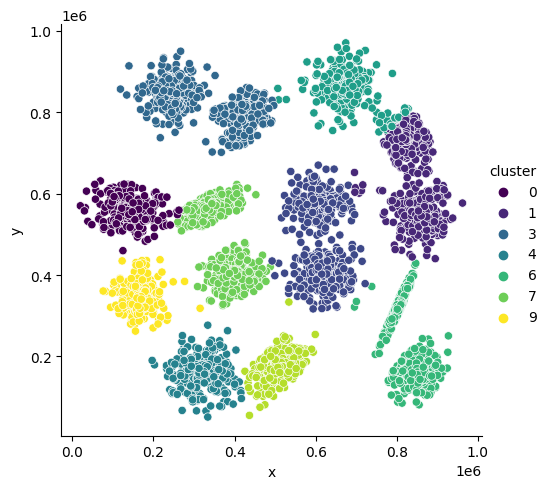

In [48]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', data=result, hue='cluster', palette='viridis')
#END CODE